# Semana 23 | Algoritmo KNN

Presenta Juliho David Castillo Colmenares

- Considere la base de datos “recursos_humanos.csv” sobre empleados que abandonan una empresa.
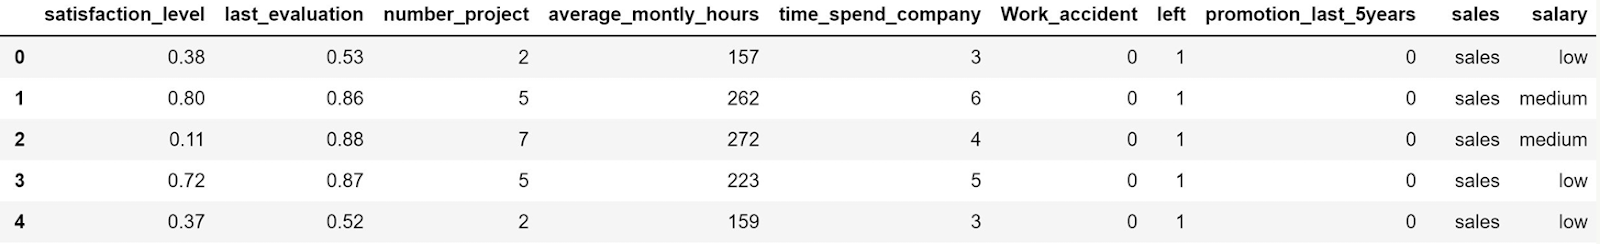

    El objetivo es analizar porqué los empleados deciden irse con la competencia y éste podría ser un desafío serio para un departamento de recursos humanos, el cual se podría abordar mediante modelos predictivos de Machine Learning. Las variables manejadas son: 

    - satisfaction_level: Nivel de satisfacción. 
    - last_evaluation: Puntaje obtenido en la ultima evaluación.
    - average_montly_hours: Promedio de horas trabajadas al mes.
    - time_spend_company: Tiempo del usuario en la compañía. 
    - work_accident: Si el empleado ha tenido algún accidente laboral (1 = Sí, 0 = No).
    - promotion_last_5years: Si el empleado ha sido promovido en los últimos 5 años.
    - sales: Departamento donde trabaja. 
    - salary: Categoría del salario. 
    - left: Variable a predecir y si el empleado dejó o no la empresa (1 = Sí, 0 = No).

- Cargue la base de datos en Python y asegúrese de re-codificar las variables categóricas de manera pertinente antes de iniciar su análisis (Sugerencia: Use `pd.get_dummies`) 


In [74]:
# %conda install -c conda-forge feature_engine
# %pip install category_encoders

In [75]:
import pandas as pd 

data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [76]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [77]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [78]:
X = data.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [79]:
y = data['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10499 entries, 10438 to 2732
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   promotion_last_5years  10499 non-null  int64  
 7   sales                  10499 non-null  object 
 8   salary                 10499 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 820.2+ KB


In [82]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
10438,0.53,0.52,2,135,4,0,0,technical,medium
9236,0.77,0.53,5,256,3,0,0,accounting,medium
818,0.89,0.79,3,149,2,0,0,support,medium
11503,0.64,0.63,3,156,6,1,0,support,low
11721,0.98,0.74,4,151,3,0,0,sales,medium


In [83]:
int_to_cat_vars = ['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
X_train[int_to_cat_vars] = X_train[int_to_cat_vars].astype('object')
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10499 entries, 10438 to 2732
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  object 
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  object 
 5   Work_accident          10499 non-null  object 
 6   promotion_last_5years  10499 non-null  object 
 7   sales                  10499 non-null  object 
 8   salary                 10499 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 820.2+ KB


In [84]:
# Select numerical variables
num_vars = X_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
num_vars

['satisfaction_level', 'last_evaluation', 'average_montly_hours']

In [85]:
from feature_engine.discretisation import DecisionTreeDiscretiser

discretiser = DecisionTreeDiscretiser(
    cv=3, scoring='accuracy',  variables=num_vars, regression=False
)

discretiser.fit(X_train, y_train)

X_train = discretiser.transform(X_train)
X_train[num_vars].head()

,satisfaction_level,last_evaluation,average_montly_hours
10438,0.020189,0.380994,0.379339
9236,0.200120,0.380994,0.294783
818,0.200120,0.277292,0.379339
11503,0.020189,0.024523,0.379339
11721,0.000000,0.024523,0.379339


In [86]:
X_test = discretiser.transform(X_test)
X_test[num_vars].head()

,satisfaction_level,last_evaluation,average_montly_hours
1670,0.772984,0.380994,0.379339
13378,0.020189,0.277292,0.020246
10233,0.200120,0.024523,0.020246
4719,0.000000,0.024523,0.020246
7003,0.000000,0.380994,0.020246


In [87]:
from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(drop_last=True)
ohe_enc.fit(X_train)
ohe_enc.variables_

['number_project',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales',
 'salary']

In [88]:
ohe_enc.encoder_dict_

{'number_project': [2, 5, 3, 4, 6],
 'time_spend_company': [4, 3, 2, 6, 8, 10, 5],
 'Work_accident': [0],
 'promotion_last_5years': [0],
 'sales': ['technical',
  'accounting',
  'support',
  'sales',
  'IT',
  'product_mng',
  'management',
  'marketing',
  'hr'],
 'salary': ['medium', 'low']}

In [89]:
X_train = ohe_enc.transform(X_train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10499 entries, 10438 to 2732
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       10499 non-null  float64
 1   last_evaluation          10499 non-null  float64
 2   average_montly_hours     10499 non-null  float64
 3   number_project_2         10499 non-null  int32  
 4   number_project_5         10499 non-null  int32  
 5   number_project_3         10499 non-null  int32  
 6   number_project_4         10499 non-null  int32  
 7   number_project_6         10499 non-null  int32  
 8   time_spend_company_4     10499 non-null  int32  
 9   time_spend_company_3     10499 non-null  int32  
 10  time_spend_company_2     10499 non-null  int32  
 11  time_spend_company_6     10499 non-null  int32  
 12  time_spend_company_8     10499 non-null  int32  
 13  time_spend_company_10    10499 non-null  int32  
 14  time_spend_company_5    

In [90]:
X_test[int_to_cat_vars] = X_test[int_to_cat_vars].astype('object')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 1670 to 2506
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     4500 non-null   float64
 1   last_evaluation        4500 non-null   float64
 2   number_project         4500 non-null   object 
 3   average_montly_hours   4500 non-null   float64
 4   time_spend_company     4500 non-null   object 
 5   Work_accident          4500 non-null   object 
 6   promotion_last_5years  4500 non-null   object 
 7   sales                  4500 non-null   object 
 8   salary                 4500 non-null   object 
dtypes: float64(3), object(6)
memory usage: 351.6+ KB


In [91]:
X_test = ohe_enc.transform(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 1670 to 2506
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       4500 non-null   float64
 1   last_evaluation          4500 non-null   float64
 2   average_montly_hours     4500 non-null   float64
 3   number_project_2         4500 non-null   int32  
 4   number_project_5         4500 non-null   int32  
 5   number_project_3         4500 non-null   int32  
 6   number_project_4         4500 non-null   int32  
 7   number_project_6         4500 non-null   int32  
 8   time_spend_company_4     4500 non-null   int32  
 9   time_spend_company_3     4500 non-null   int32  
 10  time_spend_company_2     4500 non-null   int32  
 11  time_spend_company_6     4500 non-null   int32  
 12  time_spend_company_8     4500 non-null   int32  
 13  time_spend_company_10    4500 non-null   int32  
 14  time_spend_company_5     4

- Mediante un análisis exploratorio de datos determine si esta base de datos está equilibrada o no (de acuerdo a las categorías existentes). 

Analizaremos las variables categoricas para detectar aquellas que, una vez codificadas, están fuertemente dominadas por un valor. 

In [92]:
for category in X_train.columns:
    # print(category, X_train[category].mean())
    propotion = X_train[category].mean()
    if propotion > 0.5:
        print(f"{category:25} {propotion:.2f}")

Work_accident_0           0.85
promotion_last_5years_0   0.98


Vemos que solo en los casos `Work_accident_0` y `promotion_last_5years_0`, los datos están fuertemente desbalanceados. Lo mismo ocurre con la variable objeto.

In [93]:
y_train.mean()

0.24126107248309364

- Use el método de K Vecinos más cercanos para generar un modelo predictivo. Para dicho fin, determine el valor óptimo de K evaluando distintas alternativas:  k = 1, 2, ...., 20 Asegúrese de respaldar su recomendación de la k óptima en base a una tabla que compare en cada caso las diversas precisiones comentadas en esta lección. 

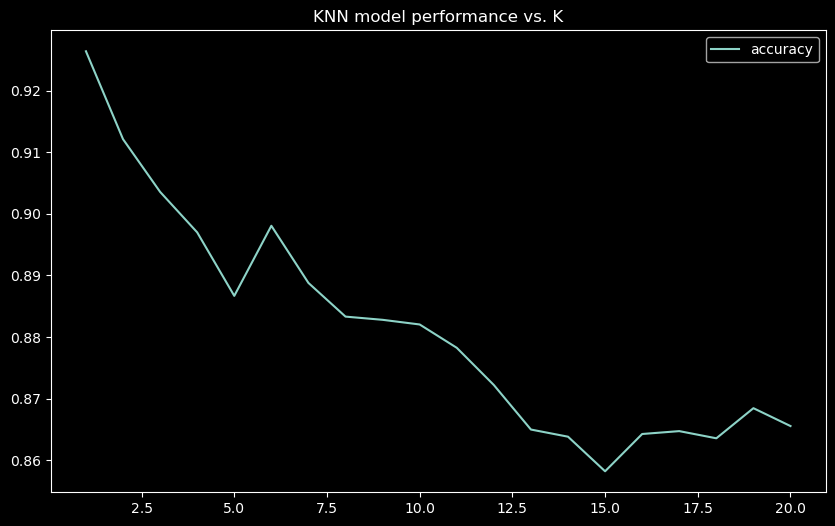

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

model_scores = {}

X_train = pd.DataFrame(X_train).values
y_train = pd.Series(y_train).values
X_test = pd.DataFrame(X_test).values
y_test = pd.Series(y_test).values

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    model_scores[k] = f1_score(y_test, y_pred)

pd.DataFrame(model_scores, index=['accuracy']).T.plot(figsize=(10, 6), title='KNN model performance vs. K')
plt.show()

In [95]:
model_scores

{1: 0.9263746505125815,
 2: 0.912109375,
 3: 0.903558052434457,
 4: 0.8969873663751216,
 5: 0.8866855524079319,
 6: 0.8980582524271845,
 7: 0.8887832699619773,
 8: 0.8833172613307618,
 9: 0.8827977315689982,
 10: 0.8820414058738566,
 11: 0.8782567503552818,
 12: 0.872216844143272,
 13: 0.8649928943628613,
 14: 0.8638318203535595,
 15: 0.8582195007065474,
 16: 0.8642685851318944,
 17: 0.8647365923113431,
 18: 0.8635710866443275,
 19: 0.8684582743988686,
 20: 0.8655581947743468}

Si bien el score más alto se alcanza para `k=1`, esto crearía un modelo poco robusto, pues es muy susceptible al sobreajuste. Se puede observar, en cambio, que hay un máximo local para `k=6`, por lo que elegiremos este valor. 

- Elabore un mapa de calor para la matriz de confusión asociada al valor óptimo de k. Interprete verbalmente cada resultado mostrado en dicha matriz. 

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[3365,   97],
       [ 113,  925]], dtype=int64)

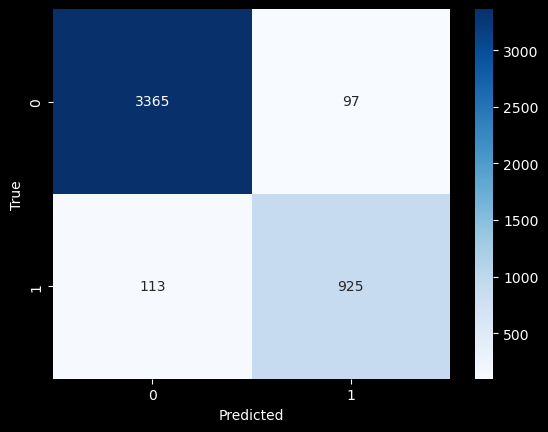

In [97]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Los resultados se resumen de la siguiente manera:
- Verdaderos negativos: 3365
- Falsos positivos: 97
- Falsos negativos: 113
- Verdaderos positivos: 925

- Obtenga e interprete la gráfica de la curva ROC para el valor óptimo de k. 

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = knn.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, _ = roc_curve(y_test, y_proba)  # Calcula FPR (tasa de falsos positivos) y TPR (pasa de verdaderos positivos)
print(fpr, tpr)


[0.         0.00895436 0.01790872 0.02801849 0.05314847 0.08058925
 0.13373772 1.        ] [0.         0.79768786 0.85067437 0.8911368  0.91233141 0.94990366
 0.98169557 1.        ]


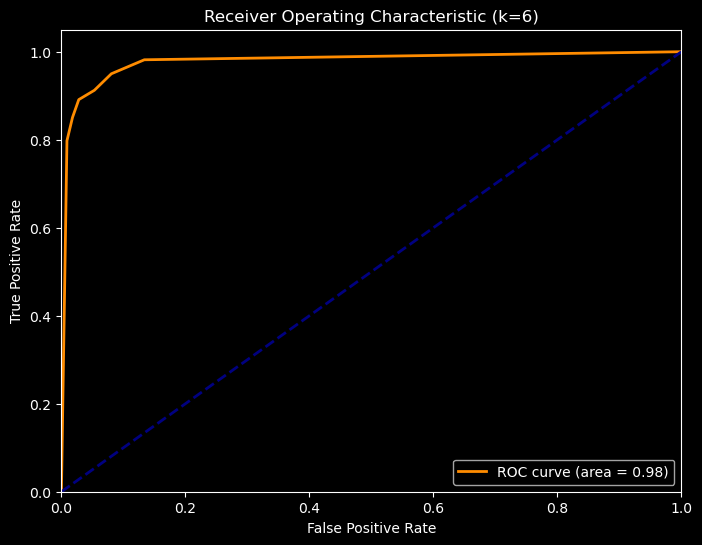

In [99]:

roc_auc = auc(fpr, tpr)  # Calcula el área bajo la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (k=6)')
plt.legend(loc="lower right")
plt.show()

El gráfico de la curva ROC se muestra arriba. El área bajo la curva ROC (AUC-ROC) es 0.95. Esto indica que el modelo tiene un excelente rendimiento en general, con una alta capacidad para discriminar entre las clases positiva y negativa.

Interpretación detallada:

Puntos en la curva: Cada punto en la curva ROC representa un umbral de decisión diferente para clasificar las muestras como positivas o negativas.
Eje x (Tasa de Falsos Positivos - FPR): Indica la proporción de muestras negativas que se clasificaron incorrectamente como positivas.
Eje y (Tasa de Verdaderos Positivos - TPR): Indica la proporción de muestras positivas que se clasificaron correctamente como positivas.
Curva ideal: Una curva ROC ideal estaría lo más cerca posible de la esquina superior izquierda, lo que significa que el modelo tiene una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.
Línea diagonal: La línea diagonal punteada representa el rendimiento de un clasificador aleatorio, que no tiene capacidad para discriminar entre las clases.
Conclusión:

En este caso, la curva ROC está muy cerca de la esquina superior izquierda y el AUC-ROC es 0.95, lo que indica que el modelo tiene un rendimiento excelente y es capaz de distinguir con precisión entre las clases positiva y negativa en la mayoría de los casos.